# S&P 500 Stock Price

## Load Data

In [1]:
import pandas as pd

def load_data():
  url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
  html = pd.read_html(url, header = 0)
  df = html[0] # get first table
  return df

In [4]:
df = load_data()
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


## Group by Sector

In [5]:
sector_unique = df['GICS Sector'].unique()
sector_unique

array(['Industrials', 'Health Care', 'Information Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer Discretionary',
       'Real Estate', 'Communication Services', 'Consumer Staples',
       'Energy'], dtype=object)

In [7]:
sector = df.groupby('GICS Sector')
sector.first()

,Symbol,Security,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
GICS Sector,,,,,,,
Communication Services,GOOGL,Alphabet Inc. (Class A),Interactive Media & Services,"Mountain View, California",2014-04-03,1652044,1998
Consumer Discretionary,ABNB,Airbnb,"Hotels, Resorts & Cruise Lines","San Francisco, California",2023-09-18,1559720,2008
Consumer Staples,MO,Altria,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985
Energy,APA,APA Corporation,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954
Financials,AFL,Aflac,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
Industrials,MMM,3M,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
Information Technology,ACN,Accenture,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products and Chemicals,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [8]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  22.0  1.150190e+06  503816.763824  29989.0  833146.75   
Consumer Discretionary  52.0  9.417031e+05  424437.605477  37996.0  820586.25   
Consumer Staples        38.0  4.932800e+05  659308.763424   7084.0   27947.75   
Energy                  22.0  8.334150e+05  654494.803186   4447.0   95502.00   
Financials              71.0  7.272561e+05  540442.918268   4962.0   79971.50   
Health Care             63.0  8.428977e+05  558701.706093   1800.0  312190.00   
Industrials             78.0  7.241301e+05  632614.510086   4281.0   76590.50   
Information Technology  67.0  9.005804e+05  498502.693082   2488.0  759324.00   
Materials               28.0  8.470378e+05  713987.434946   2969.0   67840.25   
Real Estate             31.0  9.564368e+05  373794.645688  34903.0  892604.00   
Utilities               31.0  8.730384e+05  477431.209001   4904.0  742555.00   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1225195.0  1564708.00  1754301.0  
Consumer Discretionary   943392.5  1202861.75  1590895.0  
Consumer Staples          78950.0   929235.25  1996862.0  
Energy                   946736.0  1477022.75  1841666.0  
Financials               886982.0  1139155.00  1633917.0  
Health Care              885725.0  1118775.50  1964738.0  
Industrials              760177.5  1228521.00  1996810.0  
Information Technology   896878.0  1304009.50  1730168.0  
Materials                915994.5  1419355.00  2005951.0  
Real Estate             1034054.0  1067255.50  1705696.0  
Utilities                922224.0  1078609.50  1868275.0

## Examine Data by Sector

In [9]:
sector.get_group('Health Care')

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999
15,ALGN,Align Technology,Health Care,Health Care Supplies,"Tempe, Arizona",2017-06-19,1097149,1997
33,AMGN,Amgen,Health Care,Biotechnology,"Thousand Oaks, California",1992-01-02,318154,1980
...,...,...,...,...,...,...,...,...
474,VTRS,Viatris,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
487,WAT,Waters Corporation,Health Care,Life Sciences Tools & Services,"Milford, Massachusetts",2002-01-02,1000697,1958
491,WST,West Pharmaceutical Services,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


# Finance Data


In [10]:
! pip install yfinance

In [11]:
import yfinance as yf

## List of S&P 500 Symbols

In [15]:
df['Symbol'] = df['Symbol'].str.replace('.', '-')
list(df.Symbol)

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG'

## Retrieve Stock Data

In [16]:
data = yf.download(
        tickers = list(df.Symbol),
        period = "ytd",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )

[*********************100%%**********************]  503 of 503 completed


## Plot Closing Price by Query Symbol

In [20]:
df2 = pd.DataFrame(data['ABT'].Close)
df2['Date'] = df2.index
df2

,Close,Date
Date,,
2024-01-02,108.208290,2024-01-02
2024-01-03,107.883232,2024-01-03
2024-01-04,109.321419,2024-01-04
2024-01-05,109.144112,2024-01-05
2024-01-08,110.720192,2024-01-08
...,...,...
2024-07-10,102.506180,2024-07-10
2024-07-11,103.630211,2024-07-11
2024-07-12,103.670006,2024-07-12


Text(0, 0.5, 'Closing Price')

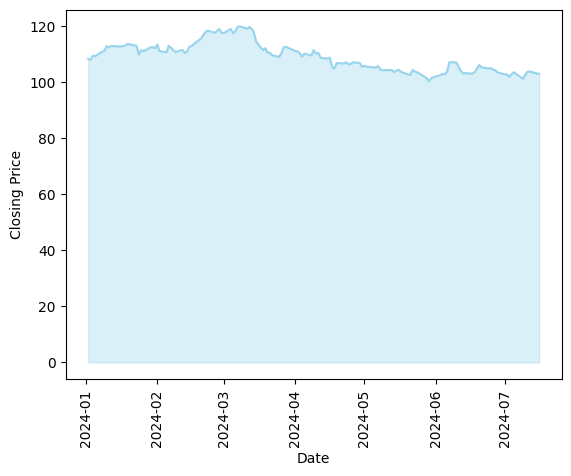

In [22]:
import matplotlib.pyplot as plt
plt.fill_between(df2.Date, df2.Close, color="skyblue", alpha=0.3)
plt.plot(df2.Date, df2.Close, color="skyblue", alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Closing Price")

In [26]:
def price_plot(symbol):
  df = pd.DataFrame(data[symbol].Close)
  df['Date'] = df.index
  plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
  plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
  plt.xticks(rotation=90)
  plt.title(symbol, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.ylabel('Closing Price', fontweight='bold')
  return plt.show()


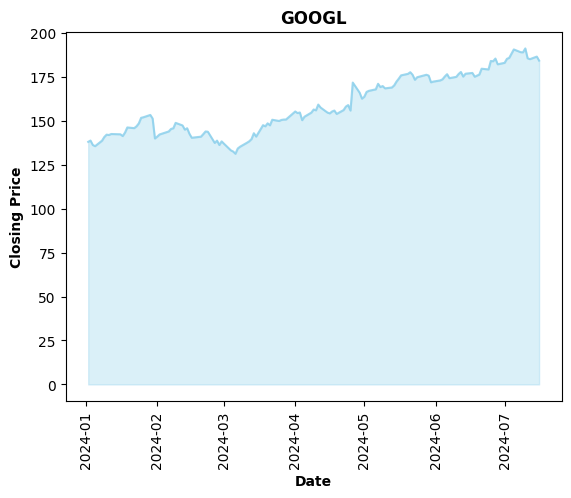

In [28]:
price_plot('GOOGL')